# <FONT COLOR="BLACK">AEVO -- ANALISTA DE DATA SCIENCE </font>


## <FONT COLOR="blue">Projeto de processamento da linguagem natural</font>

**Cientista de Dados**: Eddy Giusepe Chirinos Isidro

#### <font color="black">Contexto e o entendimento do problema de negócio</font>

Neste projeto de Processamento de Linguagem Natural (**NLP**) vamos a classificar as avaliações da **Yelp** em _categorias_ de $1$ estrela ou $5$ estrelas com base no conteúdo do texto nas revisões. Os dados utilizados são recomendações de negócios personalizados para usuários da Yelp. 

O Dados utilizados são o [conjunto de Dados de reviews da Yelp da Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).


#### <font color="black">O nosso problema de negócio:</font>      

Quais serão as CLASSIFICAÇÕES (avaliações) futuras dos usuários sobre as empresas?

Para responder essa pergunta criaremos um modelo para prever a classificação que um usuário atribuiria a uma empresa. 


#### <font color="black">Dataset:</font>

  * [yelp.csv](https://www.kaggle.com/c/yelp-recsys-2013)
  
#### <font color="black">Descrição das colunas:</font>
  * **business_id**:   id de negócios criptografado
  * **date:**  data, formatada como ``2012-03-14``, A-m-d em notação strptime
  * **review_id:**  id criptografado da empresa
  * **stars:**  classificação por estrelas
  * **text:** texto de revisão
  * **type:**  tipo
  * **user_id:**  id de usuário criptografado

votos:
  * **cool:** legal
  * **useful:** útil
  * **funny:** engraçado



A seguir desenvolvemos nosso projeto, o qual está dividido em $5$ etapas:

<font color="red">I.</font> Coleta de Dados
  
<font color="red">II.</font> Limpeza e transformação dos Dados 
  
<font color="red">III.</font> Análise e exploração dos Dados
  
<font color="red">IV.</font> Seleção do modelo
  
<font color="red">V.</font> Interpretação de resultados

# <font color="red">I. COLETA DE DADOS</font>

Nesta primeira etapa importamos nossos Dados. Esses Dados já estão no formato **.csv**. Mas para poder realizar a leitura desses Dados, precisamos em primeiro lugar importar os módulos (chamados também: bibliotecas, livrarias, etc) **mais comuns** que me permitam desenvolver esta tarefa e as demais que veremos posteriormente. Então, a seguir importamos essas bibliotecas: 


**NOTA:** As demais bibliotecas serão importadas no momento que sejam precisas!

### 1.  <FONT COLOR="blue">Importamos as bibliotecas necessárias</font>

In [2]:
import numpy as np # operações numéricas, arrays, algebra linear, etc
import pandas as pd # Manipulação e análise de Dados
import matplotlib.pyplot as plt
%matplotlib inline

import os # Funcionalidade dependente do sistema operacional
import sys # dir(sys)
import re # Expressões Regulares
                                                                    
import warnings 
warnings.filterwarnings('ignore')



### 2.  <FONT COLOR="blue">Leiamos nosso arquivo "yelp.csv" como um DataFrame chamado yelp</font>

In [3]:
yelp = pd.read_csv("yelp.csv")

### 3.  <FONT COLOR="blue">Métodos sample(), head(), info() e describe() em yelp</font>

Nesta parte verificamos que nossos Dados (yelp) hajam sido importados e lidos corretamente. Para isso verificamos através dos métodos: sample(), head(), info() e describe(). Também podemos mostrar alguns textos da nossa coluna 'text', etc.

In [4]:
yelp.sample(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
4728,wQXqj3GTHsF3AcWB3LTxMQ,2008-11-30,7ehgG9LKT0xSTenQptmLww,3,Honey Bear's is no Joe's BBQ in Gilbert but I ...,review,RknsoxpICgtuuv46uaTpyw,0,0,0
5190,d3MxUXS1b6U2P_gGuCO1-A,2012-03-06,KlkFFdVK8i3UFAtX7tt83w,2,Service was s l o w. Toook a l o n g time for ...,review,3ch-JeRygCmrXf4mwZ9JTg,1,1,0
2505,V-mvhyX6lxu5l2euYatlrQ,2009-11-02,-K4Sq6SPrYwN7cNzq3wDeA,3,Stadium was REALLY nice... the MORONS in contr...,review,_jjIaczpcVDpHlH6l334rQ,0,1,1


In [5]:
yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [6]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [7]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [8]:
# Verificamos os nomes de nossas colunas
yelp.keys()


Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [9]:
# Mais uma verificação
yelp['text'][:3]


0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
2    love the gyro plate. Rice is so good and I als...
Name: text, dtype: object

# <font color="red">II. LIMPEZA E TRANSFORMAÇÃO DOS DADOS</font>

Aqui vamos a identificar que Dados estão faltando, remover Dados duplicados, substituir valores missing (se for necessário), normalizar (se for necessário) e descubrir se existem possíveis valores que podem alterar o nosso resultado.

### 1.  <FONT COLOR="blue">Olhamos novamente nossos Dados</font>

Nesta parte de limpeza e transformação de nossos Dados, vamos olhar novamente eles com a intenção de ver que variáveis são úteis e quais não. Aquelas que não sejam úteis para nosso propósito as desconsideraremos.   

In [10]:
yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [11]:
yelp.drop(columns=['business_id', 'date', 'review_id', 'type', 'user_id'], axis=1, inplace=True)

In [12]:
yelp.head()

,stars,text,cool,useful,funny
0,5,My wife took me here on my birthday for breakf...,2,5,0
1,5,I have no idea why some people give bad review...,0,0,0
2,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0


### 2.  <FONT COLOR="blue">Vejamos se temos valores faltantes (missing)</font>

Aqui podemos observar quantitativamente que não temos Dados missing e também podemos observar os Dados que faltam em um mapa de calor (para nosso caso não falta nenhum valor).

In [13]:
# Valores missing
yelp.isna().sum()


stars     0
text      0
cool      0
useful    0
funny     0
dtype: int64

<AxesSubplot:>

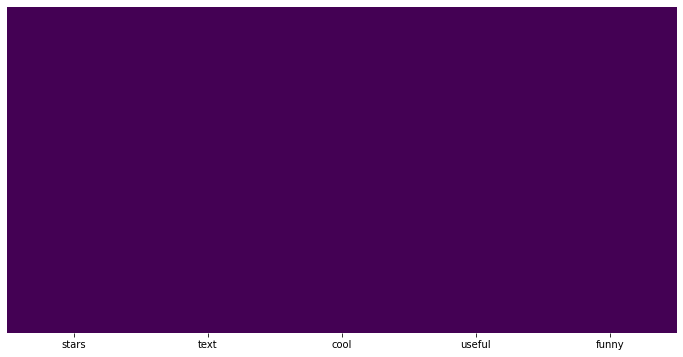

In [14]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(yelp.isnull(), yticklabels=False, cbar=False, cmap='viridis')


### 3.  <FONT COLOR="blue">Removendo Dados duplicados</font>

In [15]:
# Vai tirar apenas uma das linhas idênticas
yelp.drop_duplicates(['text'], inplace=True)


In [16]:
# Verificamos que nossos Dados tinham dois duplicados

yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 5 columns):
stars     9998 non-null int64
text      9998 non-null object
cool      9998 non-null int64
useful    9998 non-null int64
funny     9998 non-null int64
dtypes: int64(4), object(1)
memory usage: 468.7+ KB


### 4.  <FONT COLOR="blue">Quantidade de linhas para as estrelas atribuídas</font>

Aqui fazemos as contagens de linhas para cada classificação de estrelas. Como sabemos, a nossa análise está focada em classificação de $1$ estrela ou $5$ estrelas. A seguir vamos ver as quantidades: 

In [17]:
yelp.stars.value_counts()


4    3526
5    3336
3    1461
2     926
1     749
Name: stars, dtype: int64

In [18]:
# yelp['text'].count()
yelp['text'].value_counts().sum()


9998

# <font color="red">III. ANÁLISE E EXPLORAÇÃO DOS DADOS</font>

Ok, nesta parte vamos concentrar-nos em nossas variáveis principais: "text" e "stars". A seguir exploramos essas variáveis, através de gráficos, os textos em si, tokenização dos textos, etc.

### 1.  <FONT COLOR="blue">Graficamos as CATEGORIAS</font>

Aqui graficamos as classificações (categorias) num gráfico de barras.  

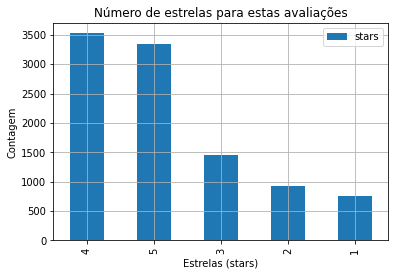

In [19]:
yelp['stars'].value_counts().plot(kind='bar')

plt.xlabel('Estrelas (stars)')
plt.ylabel('Contagem')
plt.title('Número de estrelas para estas avaliações')
plt.grid()
plt.legend()
plt.show() 


Usando a biblioteca **seaborn**, também podemos criar um countplot do número de ocorrências para cada tipo de classificação de estrelas.

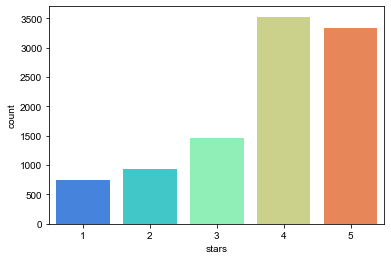

In [20]:
import seaborn as sns

sns.countplot(x='stars', data=yelp, palette='rainbow')
sns.set_style('darkgrid')


O gráfico a seguir representa **VOTOS** dos usuários em base do conteúdo do texto nas revisões. Por outro lado, estas variáveis: **"cool"**, **"useful"** e **"funny"** não serão utilizadas neste análise porque não fornecem muita informação para nosso propósito. 

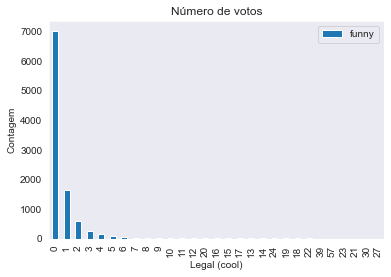

In [21]:
yelp['funny'].value_counts().plot(kind='bar')

plt.xlabel('Legal (cool)')
plt.ylabel('Contagem')
plt.title('Número de votos')
plt.grid()
plt.legend()
plt.show() 

### 2.  <FONT COLOR="blue">Dados da coluna "text" e sua respectiva categoria (classificação)</font>

Nesta parte estudaremos os textos ("text") que foram avaliados e veremos a que categoria eles pertence.  

In [22]:
for i in range(0, 3):
    print("\033[0;34mEste texto:\033[0;30m", yelp['text'][i])
    print("\033[0;41mTem uma avaliação de :\033[0;30m", yelp['stars'][i])
    


Este texto: My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
Tem uma avaliação de : 5
Este texto: I have no idea why some people give bad reviews about this pl

### 2.  <FONT COLOR="blue">Nuve de palavras, "palavras mais comuns" e "palavras incomuns" no "text"</font>

Aqui exploramos um pouco o nossos textos que foram classificados com a categoria "stars". Veremos que usando o módulo (livraria) **nltk - natural language toolkit** (``nltk.tokenize``) podemos extrair "palavras" mais comuns, eliminar caracteres especias, eliminar pontos, emoticons, etc.

In [23]:
x_yelp = yelp.loc[:, 'text'].values
y_yelp = yelp.loc[:, 'stars'].values

In [24]:
# Tokenizamos o texto com nltk

#from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import wordpunct_tokenize

def _tokenize_text(data):
    ls = []

    for line in data:
        tokens = wordpunct_tokenize(line)
        ls.append(tokens)

    return ls


In [25]:
x_yelp_tokens = _tokenize_text(x_yelp)

A seguir visualizamos os dois primeiros textos da nossa coluna **"text"**.

In [26]:
# Os dois primeiros textos TOKENIZADOS

for i in range(0, 2):
    print(x_yelp_tokens[i])
    

['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', '.', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', '.', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi', '-', 'busy', 'Saturday', 'morning', '.', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', '.', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', '.', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'", 've', 'ever', 'had', '.', 'I', "'", 'm', 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', '.', 'It', 'was', 'amazing', '.', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', ',', 'I', 'ha

In [27]:
# Um exemplo de análise exploratória em palavras
def _get_text_cloud(tokens):
    text = ''

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            text += word + ' '
        
    return text


A seguir mostramos algumas palavras (escolhidas aleatoriamente) $\Longrightarrow$ **"WordCloud"**

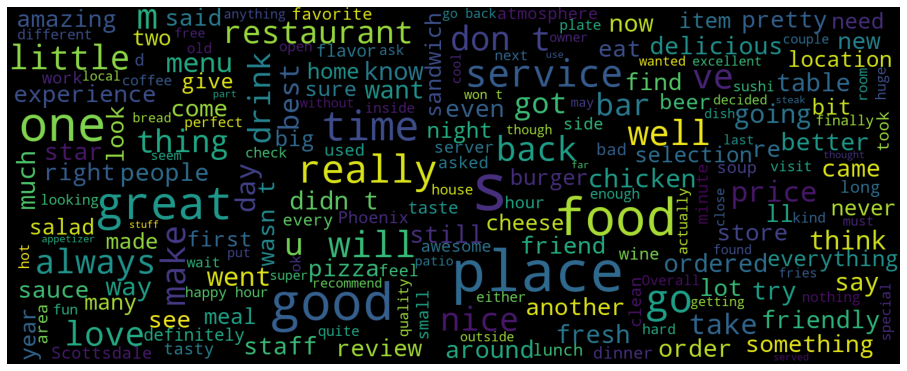

In [28]:
import random
from wordcloud import WordCloud

sample = random.sample(x_yelp_tokens, 500)
text_cloud = _get_text_cloud(sample)

word_cloud = WordCloud(max_font_size = 110, width = 1500, height = 600)
word_cloud.generate(text_cloud)
plt.figure(figsize = (16, 9))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()


In [29]:
def _get_freq_dist_list(tokens):
    ls = []

    for tk_line in tokens:
        for word in tk_line:
            ls.append(word)

    return ls

In [30]:
from nltk.probability import FreqDist

fd_list = _get_freq_dist_list(x_yelp_tokens)
fdist = FreqDist(fd_list)
print(fdist)


<FreqDist with 37652 samples and 1557919 outcomes>


A seguir mostramos os **"elementos" mais comuns** que aparecem em nossos textos.

In [31]:
most_common = fdist.most_common(20)
print(most_common)


[('.', 75553), ('the', 55208), (',', 53276), ('and', 42667), ('I', 40391), ('a', 35176), ('to', 30067), ("'", 27667), ('of', 20782), ('was', 19900), ('is', 17178), ('it', 16837), ('for', 14689), ('in', 14456), ('that', 12099), ('The', 11546), ('you', 10657), ('with', 10628), ('but', 9644), ('-', 9547)]


A seguir mostramos os **"elementos" mais incomuns** (palavras que aparecem uma vez) que aparecem em nossos textos.


In [32]:
most_uncommon = fdist.hapaxes()
print(most_uncommon[0:20])


['xeriscape', 'ballparks', 'Dept', 'poopy', 'Petello', 'Mistakes', '"!!!', ':^)', 'crudites', 'turnips', 'trailed', 'competely', 'unoticed', 'leaped', 'Shark', 'Carefully', 'oldish', 'permutations', 'Jet', 'Marcy']


Elemento que aparece um **máximo** de vezes em nossos textos.

In [33]:
fdist.max()


'.'

Graficamos a nossa distribuição de frequência dos elementos que aparecem mais vezes em nossos textos.

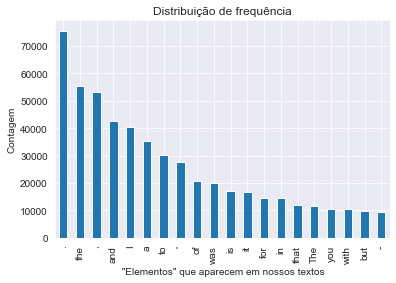

In [34]:
series = pd.Series(data=[v for k, v in most_common], index=[k for k, v in most_common], name='')
series.plot(kind='bar', title='Distribuição de frequência')
plt.xlabel(' "Elementos" que aparecem em nossos textos')
plt.ylabel('Contagem')
plt.show()


### 3.  <FONT COLOR="blue">Criamos uma coluna de **"comprimento de texto"** e estudamos ela</font>

In [35]:
# Isso é o número de "palavras" (elementos) na nossa coluna "text" 

yelp['text lenght'] = yelp['text'].apply(len)


Verificamos nossos Dados e observamos a nova coluna.
Aqui podemos verificar que cada texto tem uma quantidade de **bit** utilizados, ao qual nós chamamos de **"text lenght"**

In [36]:
yelp.head()

,stars,text,cool,useful,funny,text lenght
0,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,5,I have no idea why some people give bad review...,0,0,0,1345
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469


Criamos uma grid de $5$ histogramas de comprimento de texto com base nas categorias (classificações) das estrelas.

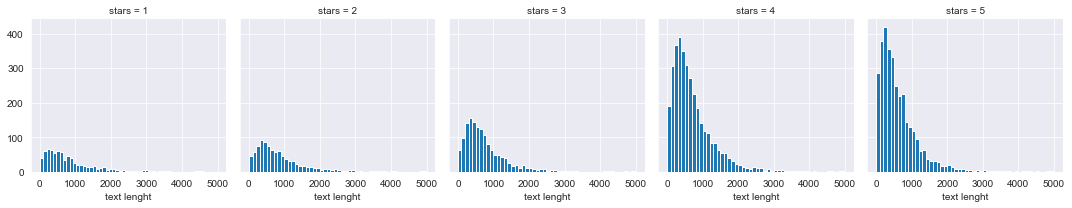

In [37]:
g = sns.FacetGrid( yelp, col='stars' )
g.map(plt.hist, 'text lenght', bins=50)
sns.set_style('darkgrid')


Usamos **groupby** para obter os valores médios das colunas numéricas com respeito a **stars**

In [38]:
stars = yelp.groupby('stars').mean()
stars


,cool,useful,funny,text lenght
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.720302,1.564795,0.876890,841.279698
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944544,1.382194,0.608813,625.182554


Podemos observar as correlações no conjunto de Dados anteriores, vejamos:

In [39]:
stars.corr()


,cool,useful,funny,text lenght
cool,1.000000,-0.741605,-0.944873,-0.858439
useful,-0.741605,1.000000,0.893846,0.700012
funny,-0.944873,0.893846,1.000000,0.845080
text lenght,-0.858439,0.700012,0.845080,1.000000


Criamos um **heatmap** (mapa de calor) com base em: ``stars.corr()``

<AxesSubplot:>

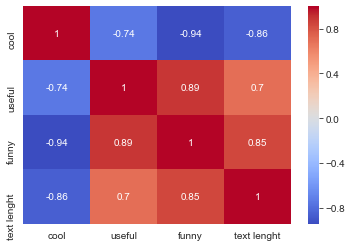

In [40]:
sns.heatmap(stars.corr(), cmap='coolwarm', annot=True)


# <font color="red">IV. SELEÇÃO DO MODELO</font>


Nesta etapa vamos a implementar nosso modelo. Para isso vamos escolher apenas comentários que foram classificados (com categorias) com $1$ estrela ou $5$ estrelas. 

### 1.  <FONT COLOR="blue">Criamos um banco de Dados "yelp_class" a qual vai conter as categorias com $1$ estrela ou $5$ estrelas</font>

In [41]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]


In [42]:
# Criamos dois objetos:
# x --> coluna text do "yelp_class"
# y --> coluna stars do "yelp_class"

x = yelp_class['text']
y = yelp_class['stars']


### 2.  <FONT COLOR="blue">Importamos CountVectorizer e criamos um objeto CountVectorizer</font>

O ``CountVectorizer`` do **Scikit-learn** é usado para transformar um corpo de texto em um vetor de contagens de termos/tokens.

In [43]:
# Importamos CountVectorizer e criamos um objeto CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [44]:
# Usamos o método fit_transform no objeto CountVectorizer e passamos
# a coluna text

x = cv.fit_transform(x)


### 3.  <FONT COLOR="blue">Divisão treino-teste</font>

Nesta parte vamos a dividir nossos Dados em Dados de treinamento e teste. 

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

### 4.  <FONT COLOR="blue">Treinamos o modelo</font>

Importamos **MultinomialNB** e criamos uma instância do estimador.

In [46]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()


Ajustamos nossa instância com dados de treino

In [47]:
nb.fit(x_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# <font color="red">V. INTERPRETAÇÃO DE RESULTADOS</font>

Nesta última etapa avaliaremos o desempenho de nosso modelo. Calcularemos a acurácia e analisaremos se é suficiente apenas com esse valor de acurácia. Calcularemos a matriz de confusão e nosso relatório já que isso dá uma visão holística. Finalmente, compararemos nossas previsões com nossos Dados. 

### 1.  <FONT COLOR="blue">**Previsões** e **avaliações** de nosso modelo.</font>

**Usamos o método predic() de nb para prever x_test.**

In [48]:
# Avaliando o nosso modelo
from sklearn.metrics import accuracy_score

pred = nb.predict(x_test)
print("\033[0;31mObtemos uma precisão de:\033[0;30m", accuracy_score(y_test, pred)*100,"%")


Obtemos uma precisão de: 93.3115823817292 %


Essa precisão é ótima!

### 2.  <FONT COLOR="blue">Matriz de confusão</font>

Olhamos a matriz de confusão e interpretamos nossos resultados 

In [49]:
from sklearn.metrics import classification_report, confusion_matrix


In [50]:
print(confusion_matrix(y_test, pred))

[[171  55]
 [ 27 973]]


### 3.  <FONT COLOR="blue">Criamos um relatório de classificação</font>

In [51]:
print('Métricas de classificação: \n',classification_report(y_test,pred))


# Nota:
# Têm CIENTISTA DE DADOS que consideram como métrica o "f1-score"
# f1-score --> É a média harmônica das outras variáveis

# 1 --> classificação com um estrela
# 5 --> classificação com cinco estrela

Métricas de classificação: 
               precision    recall  f1-score   support

           1       0.86      0.76      0.81       226
           5       0.95      0.97      0.96      1000

    accuracy                           0.93      1226
   macro avg       0.91      0.86      0.88      1226
weighted avg       0.93      0.93      0.93      1226



### 4.  <FONT COLOR="blue">Gabarito e previsões de nosso modelo</font>

In [52]:
gabarito = pd.DataFrame({'Gabarito': y_test,
                         'Previsões de nosso modelo': pred})
gabarito


,Gabarito,Previsões de nosso modelo
2414,5,5
3552,1,1
5368,5,5
1222,5,5
5012,5,5
...,...,...
5628,5,5
862,5,5
5312,5,5
9782,5,5


# Usando Pipeline

Utilizaremos **Pipeline** para poder verificar nossos resultados (saber se piora ou melhora).  Só para lembrar: o Pipeline é uma sequência de transformações seguidas de um estimador final. O objetivo é reunir diversas etapas para serem validadas em conjunto ao definir parâmetros diferentes.


### 1.  <FONT COLOR="blue">Importamos TfidfTransformer</font>

Uma das técnicas mais amplamente utilizadas para processar dados textuais é o **TF-IDF**.

**Tf**, nos dá a frequência da palavra em cada conteúdo. É a proporção do número de vezes que a palavra aparece em um conteúdo em comparação com o número total de palavras nesse conteúdo. 


**idf**, usado para calcular o peso de palavras raras em todos os documentos do corpus.

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer


### 2.  <FONT COLOR="blue">Importamos Pipeline do sklearn</font>

In [54]:
from sklearn.pipeline import Pipeline


### 3.  <FONT COLOR="blue">Criamos o Pipeline com as seguintes etapas</font>

In [55]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tdidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])


# NOTA: Podemos tentar usar o seguinte classificador e ver que dá !
# from sklearn.tree import DecisionTreeClassifier

### 4.  <FONT COLOR="blue">Usando o Pipeline</font>


In [56]:
x = yelp_class['text']
y = yelp_class['stars']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, 
                                                    random_state=80)

Logo ajustamos o Pipeline aos Dados de treinamento. Lembremos que não podemos usar os mesmos Dados de treinamento da última vez porque esses Dados já foram vetados. Precisamos passar apenas no texto e nos rótulos.

In [57]:
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tdidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

### 5.  <FONT COLOR="blue">previsões e avaliações de nosso modelo</font>


Usamos o Pipeline para prever a partir do x_test.
Criamos também um relatório de classificação e a matriz de confusão.

In [58]:
pred = pipeline.predict(x_test)

In [59]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[  0 230]
 [  0 996]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       230
           5       0.81      1.00      0.90       996

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



### 6.  <FONT COLOR="blue">Gabarito e previsões com nosso Pipeline</font>

In [60]:
gabarito = pd.DataFrame({'Gabarito': y_test,
                         'Previsões de nosso modelo': pred})
gabarito


,Gabarito,Previsões de nosso modelo
4823,5,5
5712,5,5
9786,5,5
321,1,5
9614,5,5
...,...,...
9793,5,5
4709,5,5
5229,1,5
3496,5,5


# <font color="green">Observações finais:<font>
    
* Nosso modelo teve um bom desempenho (uma boa acurácia) considerando apenas as categorias de $1$ estrela ou $5$ estrelas. Tal como podemos observar nas etapas desenvolvidas acima. Mas, quando consideramos todas as categórias obtemos uma acurácia de aproximadamente do $60$%, o qual sabemos que não é um bom desempenho.

* Utilizando o Pipeline reparamos que nosso modelo teve uma boa acurácia, mas isso não é suficiente para ter uma conclusão. Por isso que sempre é necessário olhar a matriz de confusão e o relatório de classificação já que nos dá uma visão holística. 

* Neste projeto escolhimos Dados (textos) em inglês porque é um pouco mais simples de tratar comparados como textos em português, já que isso demandaria mais tempo. 

* Algo muito importante que devemos lembrar: é que podemos testar nosso modelo com outros classificadores e ver o desempenho da mesma. (Fizimos, por exemplo, com modelo **DecisionTreeClassifier**) 

# <font color="orange">Muito obrigado !</font>